In [4]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
# Load models

vgg16 = tf.keras.models.load_model("models/VGG16_ArtStyleClass.h5", compile=False)
resnet50 = tf.keras.models.load_model("models/ResNet50V2_ArtStyleClass.h5", compile=False)

In [10]:
style_labels = {
    'Abstract Art': 0,
    'Cubism': 1,
    'Expressionism': 2,
    'Impressionism': 3,
    'Realism': 4
}

In [11]:
expressionism_img = Image.open("Images/IMG_3386.jpg")
expressionism_img  = expressionism_img .convert('RGB')
expressionism_img  = expressionism_img .resize((224, 224))
expressionism_img_array = np.asarray(expressionism_img ) / 255

abstract_img = Image.open("Images/abstract.jpeg")
abstract_img = abstract_img.convert('RGB')
abstract_img = abstract_img.resize((224, 224))
abstract_img_array = np.asarray(abstract_img) / 255

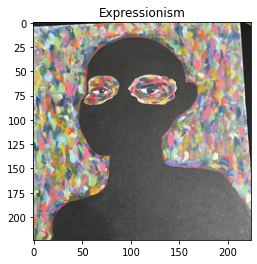

In [12]:
plt.imshow(expressionism_img_array)
plt.title('Expressionism')
plt.show()

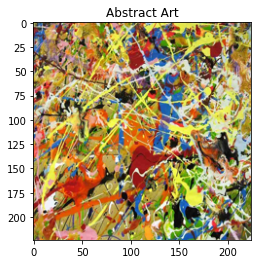

In [13]:
plt.imshow(abstract_img_array)
plt.title('Abstract Art')
plt.show()

In [14]:
# For Expressionism

expressionism_img_batch = np.expand_dims(expressionism_img_array, axis=0)
prediction_vgg16 = vgg16.predict(expressionism_img_batch)
vgg16_class = np.argmax(prediction_vgg16, axis=1)

prediction_resnet = resnet50.predict(expressionism_img_batch)
resnet50_class = np.argmax(prediction_resnet, axis=1)

1/1 [==============================] - 1s 977ms/step


In [15]:
vgg16_pred = vgg16_class[0]
resnet_pred = resnet50_class[0]

vgg16_predicted_style_label = [label for label, index in style_labels.items() if index == vgg16_pred][0]
resnet_predicted_style_label = [label for label, index in style_labels.items() if index == resnet_pred][0]

print(f"VGG16 prediction: {vgg16_predicted_style_label}")
print(f"ResNet50 prediction: {resnet_predicted_style_label}")
print("The painting is an Expressionism painting")

VGG16 prediction: Expressionism
ResNet50 prediction: Cubism
The painting is an Expressionism painting


In [16]:
# For Abstract Art

abstract_img_batch = np.expand_dims(abstract_img_array, axis=0)
prediction_vgg16 = vgg16.predict(abstract_img_batch)
vgg16_class = np.argmax(prediction_vgg16, axis=1)

prediction_resnet = resnet50.predict(abstract_img_batch)
resnet50_class = np.argmax(prediction_resnet, axis=1)

1/1 [==============================] - 0s 41ms/step


In [17]:
vgg16_pred = vgg16_class[0]
resnet_pred = resnet50_class[0]

vgg16_predicted_style_label = [label for label, index in style_labels.items() if index == vgg16_pred][0]
resnet_predicted_style_label = [label for label, index in style_labels.items() if index == resnet_pred][0]

print(f"VGG16 prediction: {vgg16_predicted_style_label}")
print(f"ResNet50 prediction: {resnet_predicted_style_label}")
print("The painting is an Abstract Art painting")

VGG16 prediction: Expressionism
ResNet50 prediction: Cubism
The painting is an Abstract Art painting


### Live Demo

In [18]:
img = Image.open("Images/new_form.jpeg")
img = img.convert('RGB')
img = img.resize((224, 224))
img_array = np.asarray(img) / 255

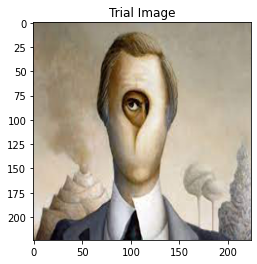

In [19]:
plt.imshow(img_array)
plt.title('Trial Image')
plt.show()

In [20]:
img_batch = np.expand_dims(img_array, axis=0)
prediction_vgg16 = vgg16.predict(img_batch)
vgg16_class = np.argmax(prediction_vgg16, axis=1)

prediction_resnet = resnet50.predict(img_batch)
resnet50_class = np.argmax(prediction_resnet, axis=1)

1/1 [==============================] - 0s 33ms/step


In [21]:
vgg16_pred = vgg16_class[0]
resnet_pred = resnet50_class[0]

vgg16_predicted_style_label = [label for label, index in style_labels.items() if index == vgg16_pred][0]
resnet_predicted_style_label = [label for label, index in style_labels.items() if index == resnet_pred][0]

print(f"VGG16 prediction: {vgg16_predicted_style_label}")
print(f"ResNet50 prediction: {resnet_predicted_style_label}")

VGG16 prediction: Expressionism
ResNet50 prediction: Cubism
